In [66]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
h_data = pd.read_csv("./h_data.csv")

In [67]:
list(h_data)

['ID',
 'AdmissionLengthDays',
 'Death_1',
 'Admission_Type',
 'Insurance_Type',
 'EnglishLanguage_1',
 'Religion_Type',
 'Married_1',
 'Race',
 'Dx']

In [68]:
h_data.dtypes.value_counts()

object     5
int64      4
float64    1
dtype: int64

In [69]:
h_data.select_dtypes(include='object')

,Admission_Type,Insurance_Type,Religion_Type,Race,Dx
0,elective,private,episcopalian,white,mitral stenosis\mitral valve replacement /sda
1,elective,private,catholic,white,duodenal mass/sda
2,emergency,medicare,catholic,asian - japanese,? serotonin syndrome
3,elective,medicare,catholic,white,abdominal aortic aneurysm/sda
4,elective,government,protestant quaker,black/african american,absence/sda
...,...,...,...,...,...
58858,elective,medicare,catholic,white,zenker's diverticulum/sda
58859,elective,medicare,catholic,white,zenker's diverticulum/sda
58860,emergency,private,unobtainable,white,zone 2 neck injury
58861,emergency,medicare,not specified,black/african american,zoster vs. meningitis


In [70]:
h_data["Insurance_Type"].unique()


array(['private', 'medicare', 'government', 'medicaid', 'self pay'],
      dtype=object)

In [71]:
h_data["AdmissionLengthDays"].describe()

count    58863.000000
mean        10.138978
std         12.465611
min         -0.945139
25%          3.743056
50%          6.465972
75%         11.798264
max        294.660417
Name: AdmissionLengthDays, dtype: float64

In [72]:
print(h_data["Admission_Type"].mode())
print(h_data["Insurance_Type"].mode())
print(h_data["Religion_Type"].mode())
print(h_data["Race"].mode())
print(h_data["Dx"].mode())


0    emergency
dtype: object
0    medicare
dtype: object
0    catholic
dtype: object
0    white
dtype: object
0    newborn
dtype: object


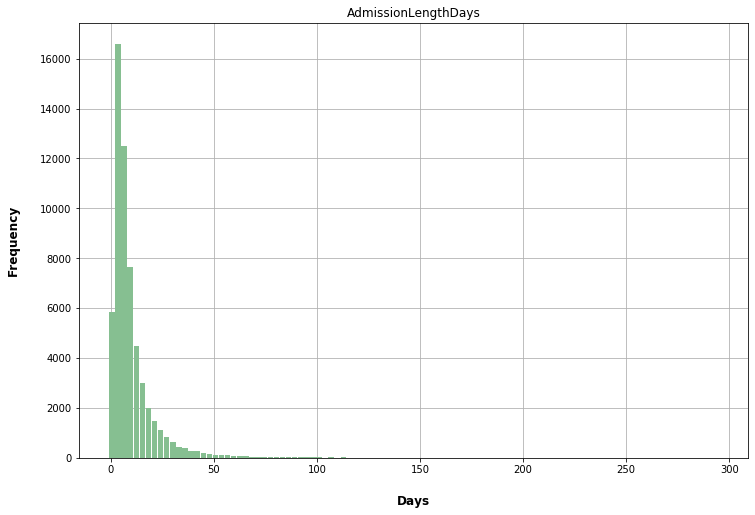

In [76]:
hist_g = h_data.hist(column='AdmissionLengthDays', bins=100, grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

hist_g = hist_g[0]
for x in hist_g:
    x.set_xlabel("Days", labelpad=20, weight='bold', size=12)
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)

The regular histogram for admission length days illustrates a skewed right distribution (possibly low standard deviation). While the log admission length days shows a skewed right distribution too, but with a more apparent shape and proper scale along the y axis.


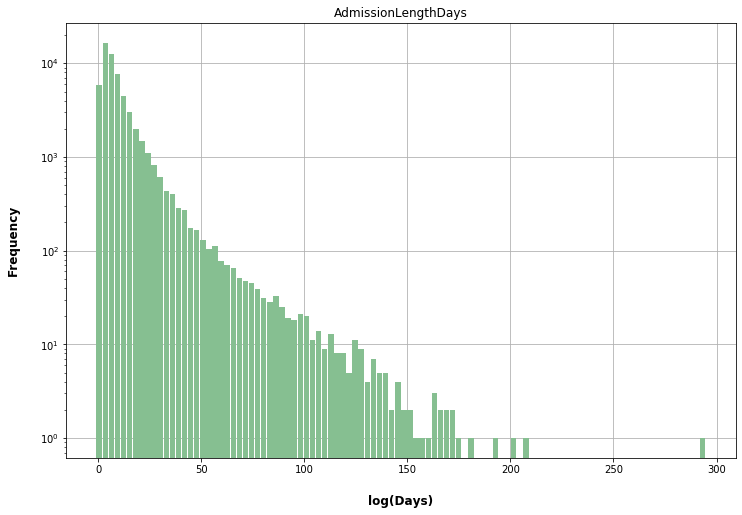

In [83]:
Log = h_data.hist(column='AdmissionLengthDays', bins=100, grid=True, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

Log = Log[0]
for x in Log:
    x.set_xlabel("log(Days)", labelpad=20, weight='bold', size=12)
    x.set_ylabel("Frequency", labelpad=20, weight='bold', size=12)
    x.set_yscale('log')
    
print("The regular histogram for admission length days illustrates a skewed right distribution (possibly low standard deviation). While the log admission length days shows a skewed right distribution too, but with a more apparent shape and proper scale along the y axis.")

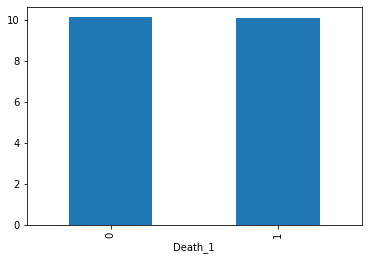

In [63]:
days_hospital = h_data.groupby("Death_1")
days_hospital["AdmissionLengthDays"].mean().plot(kind = 'bar')

In [55]:
insurance_type = h_data.groupby("Death_1")
insurance_type["Insurance_Type"].unique()

Death_1
0    [private, medicare, government, medicaid, self...
1    [medicare, medicaid, private, government, self...
Name: Insurance_Type, dtype: object